In [12]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree   import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate
)
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    precision_score,
    accuracy_score,
    recall_score
)
warnings.filterwarnings('ignore')

### 1. Loading Data

In [13]:
X_train = np.load('Artifacts/X_train.npz')['arr_0']
Y_train = np.load('Artifacts/Y_train.npz')['arr_0']
X_test = np.load('Artifacts/X_test.npz')['arr_0']
Y_test = np.load('Artifacts/Y_test.npz')['arr_0']

### 2. Define Multi Model

In [14]:
models ={
    'logistic_regression': LogisticRegression(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier()
    
}

### 2. Configure K-Fold CV

In [15]:
cv = StratifiedKFold(
    n_splits=6,
    random_state=42,
    shuffle=True

)

In [19]:
trained_models = {}
for model_name, model in models.items():
    print(f"\nCross Validation: {model_name}")

    cv_results = cross_validate(
        model,
        X_train,
        Y_train,
        cv=cv, scoring='f1',
        return_estimator=True,
        return_train_score=False

    )
    test_scores = cv_results['test_score']
    best_index = np.argmax(test_scores)

    estimator = cv_results['estimator'][best_index]
    trained_models[model_name] = estimator


Cross Validation: logistic_regression

Cross Validation: decision_tree

Cross Validation: random_forest


In [20]:
Y_hat_tests={}
for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test
Y_hat_tests

{'logistic_regression': array([0, 0, 0, ..., 0, 0, 1]),
 'decision_tree': array([0, 1, 0, ..., 1, 0, 1]),
 'random_forest': array([0, 0, 0, ..., 1, 0, 1])}

In [22]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['logistic_regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['decision_tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['random_forest'])

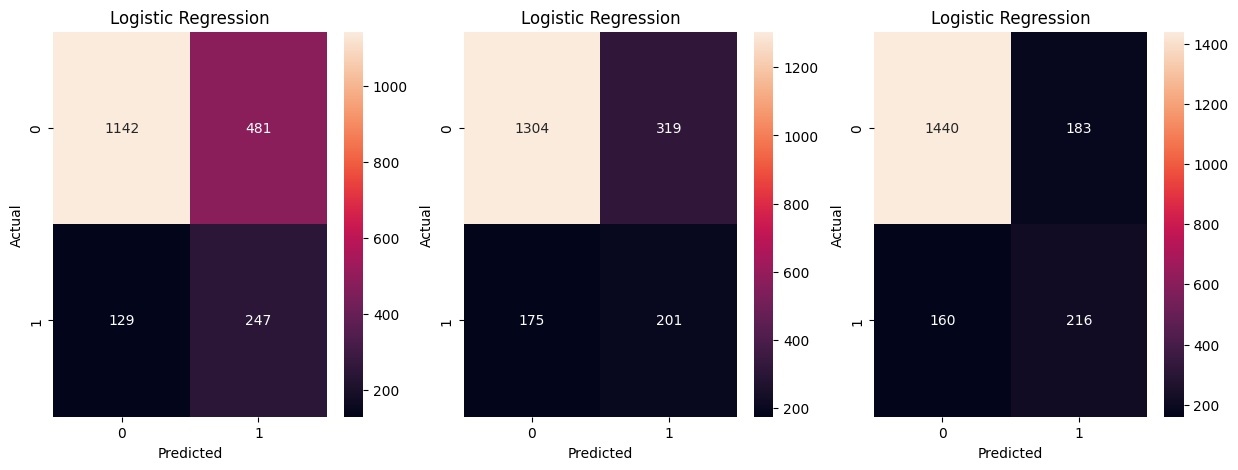

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Logistic Regression')


sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Logistic Regression')


sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')
ax3.set_title('Logistic Regression')
plt.show()
